<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optimal number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was preprocessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [255]:
# Allowing multiple outputs to be shown for each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [256]:
# YOUR CODE HERE
import pandas as pd
import numpy as np

past = pd.read_csv("../dat/past.csv.gz")
past.columns

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')

<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

In [257]:
# Some initial EDA
past.shape
past.head()

(5000, 37)

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
0,5866936,5.618978e+08,1.333333,1.333333,5550.000,15.84000,15.84000,0.00,1.333333,0.00,...,0.00,0.000,0.0,0.666667,0.333333,0.00,0.00,0,0.00,1.0
1,5647110,5.326529e+08,2.250000,1.500000,27556.500,5.80000,5.56500,1.25,0.250000,0.25,...,0.25,0.750,0.0,0.000000,0.250000,0.00,0.00,0,0.00,1.0
2,5790472,4.578109e+08,1.000000,1.000000,0.000,6.27250,6.27250,0.25,0.750000,0.00,...,0.00,0.000,0.0,0.000000,0.750000,0.25,0.00,0,0.00,1.0
3,5811598,4.612641e+08,1.500000,1.500000,131532.500,5.56000,5.56000,0.25,1.000000,0.25,...,0.25,0.000,0.0,0.000000,0.500000,0.00,0.25,0,0.25,1.0
4,5846363,5.157993e+08,1.875000,1.375000,11055.875,4.08625,4.08625,0.50,1.000000,0.25,...,0.25,0.375,0.0,0.125000,0.250000,0.25,0.00,1,0.00,1.0


In [258]:
# Checking for missing values and datatypes
past.isnull().sum().sum()
past.dtypes

0

product_id                int64
user_id                 float64
NumOfEventsInJourney    float64
NumSessions             float64
interactionTime         float64
maxPrice                float64
minPrice                float64
NumCart                 float64
NumView                 float64
NumRemove               float64
InsessionCart           float64
InsessionView           float64
InsessionRemove         float64
Weekend                 float64
Fr                      float64
Mon                     float64
Sat                     float64
Sun                     float64
Thu                     float64
Tue                     float64
Wed                     float64
2019                    float64
2020                    float64
Jan                     float64
Feb                     float64
Oct                     float64
Nov                     float64
Dec                     float64
Afternoon               float64
Dawn                    float64
EarlyMorning            float64
Evening 

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

In [259]:
past['Purchased?'].mean() # YOUR CODE HERE

0.3438

`Answer`: 34.4% of interactions resulted in a purchase. Window shopping is therefore more common than buying interactions where the customer bought what they were looking at. Also, from the perspective of classification, the data is imbalanced.

3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`: `X`; then pop the column `'Purchased?'` and save it to `y`.

In [260]:
X = past.drop(columns=['product_id', 'user_id']) # YOUR CODE HERE
y = X.pop('Purchased?') # YOUR CODE HERE

In [261]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

`Answer`: In general, it is a good idea to scale your features into a common range, like 0-1, but it is possible to perform PCA using the correlation matrix of unscaled data in order to have comparable results to using the standard method of PCA with the covariance matrix on scaled data.

In [262]:
# Here, we use best practices to split the data before doing PCA, in order to avoid data leakage
# when scaling and calculating our principal components.
from sklearn.model_selection import train_test_split

X_train, X_val, _, _ = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_val.shape)
print(type(X_train))

(4000, 34)
(1000, 34)
<class 'pandas.core.frame.DataFrame'>


In [263]:
# Checking to see distribution of target value between train and val datasets
y[X_train.index].mean()
y[X_val.index].mean()

0.342

0.351

Relatively even distribution of the target value, so no need to use stratify parameter in this case with the train_test_split function.

In [264]:
# YOUR CODE HERE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=5, random_state=42, whiten=True)

# Scaling before performing PCA
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)
X_v_scaled = scaler.transform(X_val)

# PCA
X_reduced_train = pca.fit_transform(X_tr_scaled)
X_reduced_val = pca.transform(X_v_scaled)

# Converting back to dataframe for later steps
X_reduced_train = pd.DataFrame(X_reduced_train, index=X_train.index)
X_reduced_val = pd.DataFrame(X_reduced_val, index=X_val.index)

# Combining train and val into the same dataframe for further steps
X_reduced = pd.concat([X_reduced_train, X_reduced_val], axis=0)

In [265]:
assert X_reduced.shape == (5000, 5) # Dimensionality reduction completed from 34 features to 5

In [266]:
X_reduced.head()

,0,1,2,3,4
2913,1.235995,-1.067321,-0.547410,-1.139220,0.957964
3275,-1.086692,0.620709,-0.341928,0.575909,2.205328
775,-1.039603,0.114345,0.079879,-0.258891,-0.248790
217,1.138276,-1.413873,-0.235156,-0.542734,0.877348
1245,-0.737246,0.426479,-0.399559,-0.436495,-0.665646


5. Print out the percentage of variance explained by each of the selected components.

In [267]:
import numpy as np
print(f'Explained variation per principal component: {np.round(pca.explained_variance_ratio_, 2)}') # YOUR CODE HERE

Explained variation per principal component: [0.1  0.09 0.07 0.05 0.04]


6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [268]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [269]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

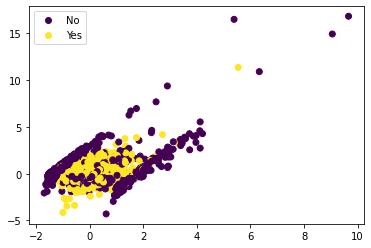

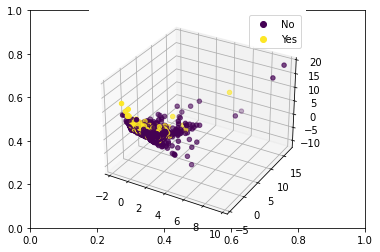

In [270]:
# Using y[X_reduced.index] to order y in the same order as X_reduced
visualize_2pcs(X_reduced.to_numpy(), y[X_reduced.index]) # YOUR CODE HERE
visualize_3pcs(X_reduced.to_numpy(), y[X_reduced.index]) # YOUR CODE HERE

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for splitting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [271]:
# YOUR CODE HERE (imports!)
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def train(X, y, standardize = True) -> None:
    # YOUR CODE HERE
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Here we just verify that splitting our data using the same random seed as before PCA
    # results in the same splitting of our data, to once again avoid data leakage while
    # remaining within the bounds of the required parameters of this function
    assert np.any(X_test.index == X_val.index) 

    if standardize==True:
        pipe = make_pipeline(StandardScaler(),\
            LogisticRegression(class_weight='balanced', random_state=42))
    else:
        pipe = make_pipeline(LogisticRegression(class_weight='balanced', random_state=42))  
    
    # Fitting pipeline
    pipe.fit(X_train, y_train)

    # Evaluation of predictions
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))

Now apply the pipeline on the all the features `X` and review the performance

In [272]:
train(X, y, standardize=True) # YOUR CODE HERE

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       649
           1       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [273]:
train(X_reduced.sort_index(), y, standardize=False) # YOUR CODE HERE

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       649
           1       0.50      0.53      0.51       351

    accuracy                           0.65      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.65      0.65      0.65      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    *YOUR ANSWER HERE*

`ANSWER`: The results were just as expected, as the prediction performance on the reduced features was comparable and almost the same as the prediction performance on the given features. One of the cons to using a reduced set of features is that there was a slight drop in performance on a few metrics, which might have been more significant on a different dataset. One of the major pros, however, is the huge decrease of computational burden of the data (from 34 features down to 5) while retaining almost all of the information necessary to make a prediction. With a more complex model than logistic regression, this reduced dataset will likely get much better prediction performance.

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting with different values of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [274]:
# YOUR CODE HERE
from sklearn.cluster import KMeans

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [275]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        km = KMeans(n_clusters=k, random_state=10)# YOUR CODE HERE 
        km.fit(X) # YOUR CODE HERE
        inertias.append(km.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

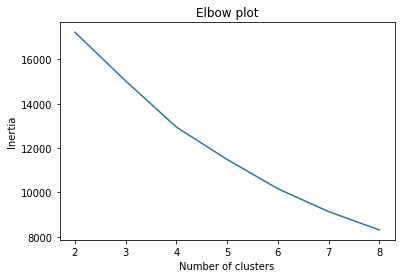

In [276]:
# Once again, to avoid data leakage we select only the first 4000 rows,
# since these were the rows that were used to fit the scaler and PCA.
visualize_elbow(X_reduced[:4000], list(range(2, 9)))# YOUR CODE HERE

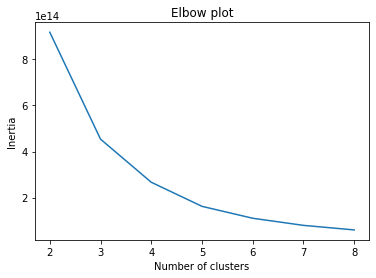

In [277]:
# Here we just check the difference seen in the elbow plot of the non-reduced features
visualize_elbow(X, list(range(2, 9)))# YOUR CODE HERE

4. What are the disadvantages of using the Elbow method? 

`Answer`: One of the main disadvantages, seen particularly in the first elbow plot performed on the reduced features, is that it can sometimes be very difficult to find the "elbow" of the plot, which makes the process even more subjective and qualitative. Another disadvantage of this method, and potentially other similar methods, is that K-means might have to be run on the dataset over a wide range of clusters, depending on the distribution of the data, which doesn't scale well for more complex data. A more quantitative measure of the optimal amount of clusters could be of great help.

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [278]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.20579794627675246
For n_clusters = 3 The average silhouette_score is : 0.21599369835671695
For n_clusters = 4 The average silhouette_score is : 0.2238409508130312
For n_clusters = 5 The average silhouette_score is : 0.22723744063700355
For n_clusters = 6 The average silhouette_score is : 0.2053777456485164
For n_clusters = 7 The average silhouette_score is : 0.20965023176065659
For n_clusters = 8 The average silhouette_score is : 0.22085664948827471


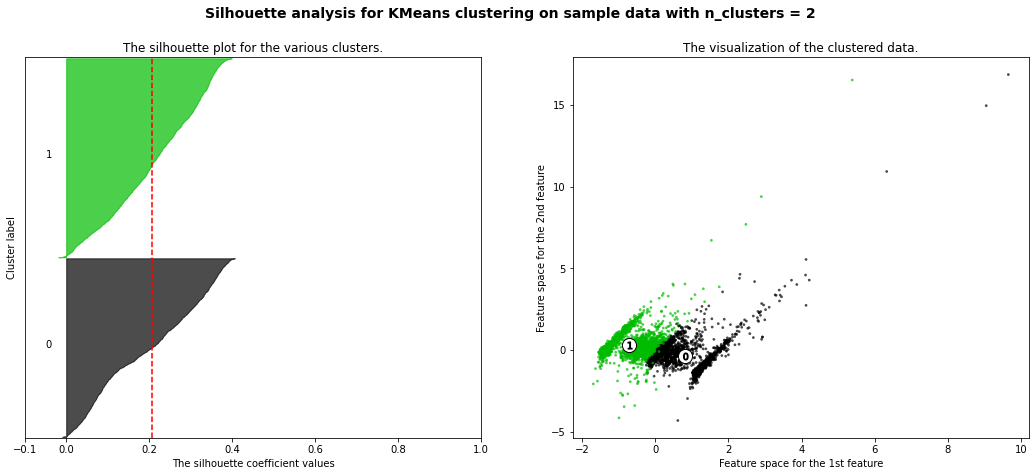

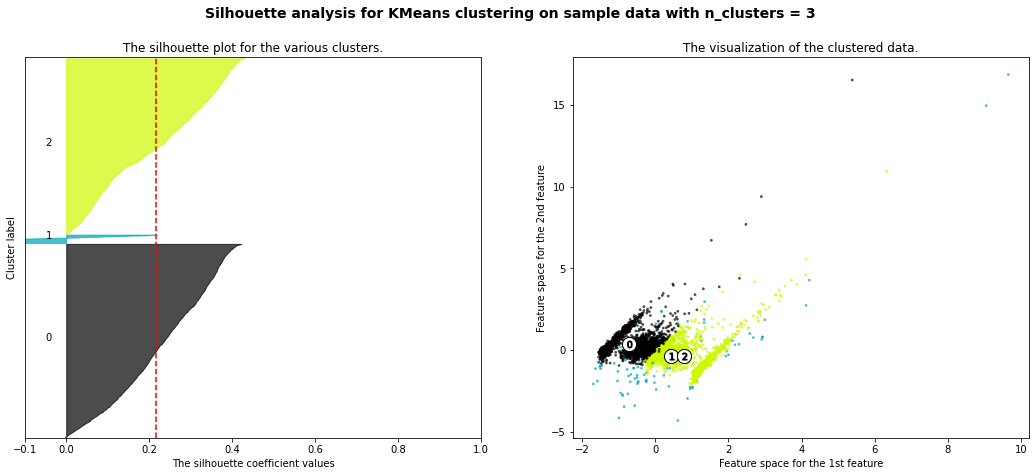

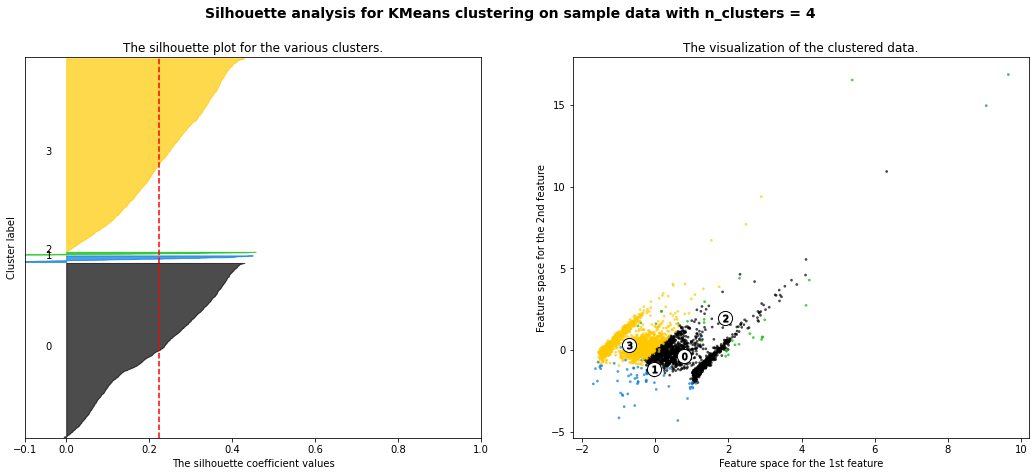

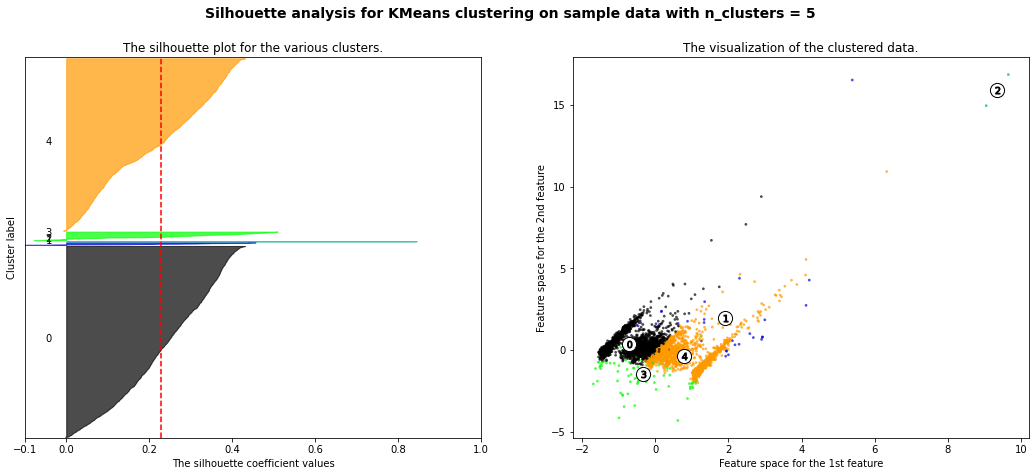

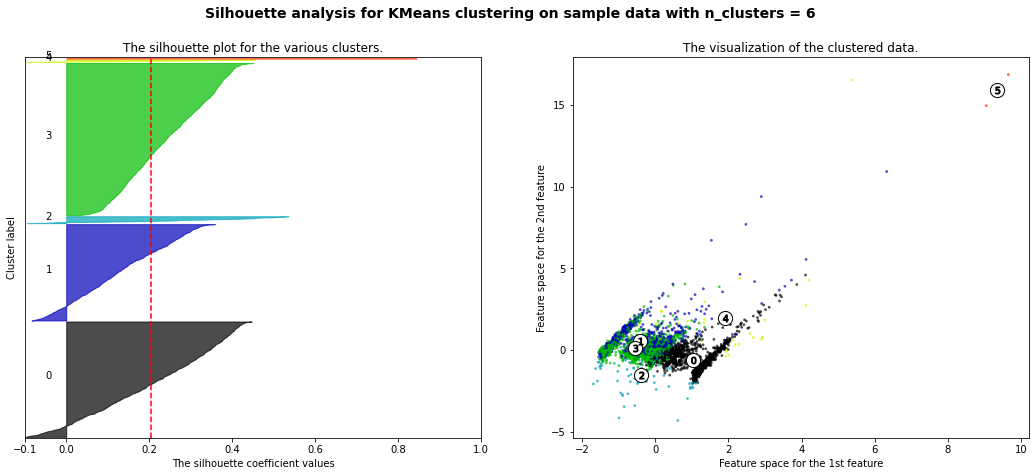

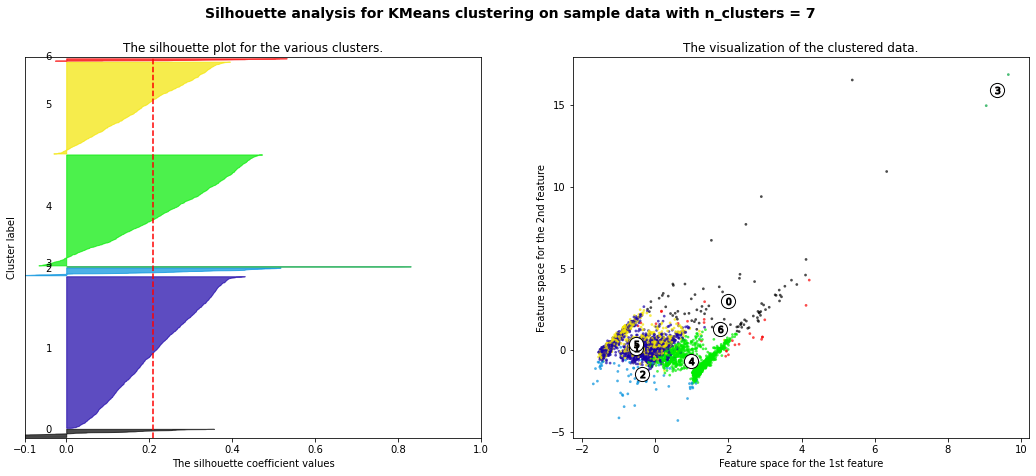

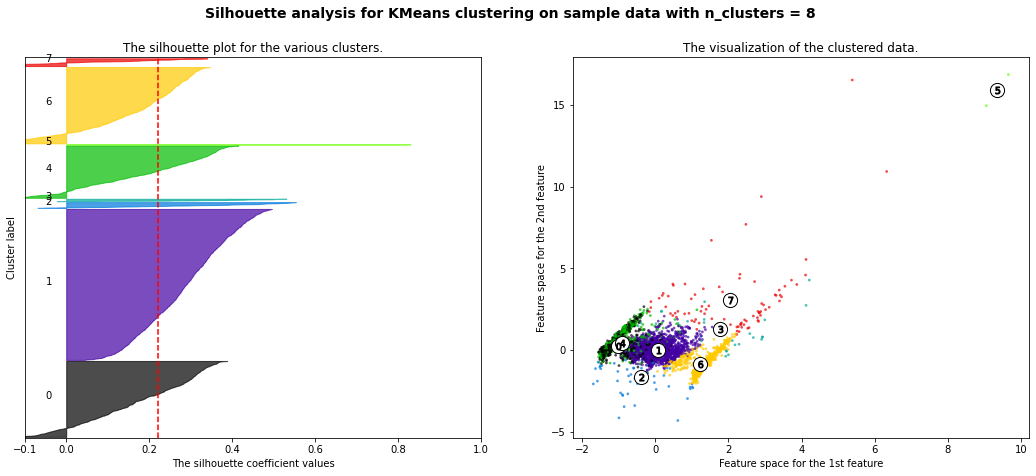

In [279]:
# YOUR CODE HERE
visualize_silhouette(8, X_reduced[:4000].to_numpy(), random_state=0)

5 clusters was deemed the optimal amount for K-means in this case, although multiple attempts with different random state values suggested a different optimal amount of clusters, including 2 and 6.

6. Instantiate a k-means model using the number of clusters that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [280]:
# YOUR CODE HERE
# Note: also used the same random state as used during the calculation of silhouette scores
km = KMeans(n_clusters=5, random_state=0)

# Fitting on first 4000 rows again to avoid data leakage
km.fit(X_reduced[:4000])

KMeans(n_clusters=5, random_state=0)

7. What is the size of each cluster? 

In [281]:
# YOUR CODE HERE
temp_df = pd.DataFrame(km.labels_, columns=['cluster'])
temp_df.head()

,cluster
0,4
1,0
2,0
3,4
4,0


In [282]:
temp_df.value_counts()

cluster
0          2038
4          1839
3            93
1            28
2             2
dtype: int64

`Answer`: Clearly, clusters 0 and 4 dominate with regards to their size, with around 20 times as many points as the next-largest cluster.

8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [283]:
# YOUR CODE HERE
past['cluster_pca'] = km.predict(X_reduced.sort_index())
past.head()

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,cluster_pca
0,5866936,5.618978e+08,1.333333,1.333333,5550.000,15.84000,15.84000,0.00,1.333333,0.00,...,0.000,0.0,0.666667,0.333333,0.00,0.00,0,0.00,1.0,4
1,5647110,5.326529e+08,2.250000,1.500000,27556.500,5.80000,5.56500,1.25,0.250000,0.25,...,0.750,0.0,0.000000,0.250000,0.00,0.00,0,0.00,1.0,4
2,5790472,4.578109e+08,1.000000,1.000000,0.000,6.27250,6.27250,0.25,0.750000,0.00,...,0.000,0.0,0.000000,0.750000,0.25,0.00,0,0.00,1.0,4
3,5811598,4.612641e+08,1.500000,1.500000,131532.500,5.56000,5.56000,0.25,1.000000,0.25,...,0.000,0.0,0.000000,0.500000,0.00,0.25,0,0.25,1.0,4
4,5846363,5.157993e+08,1.875000,1.375000,11055.875,4.08625,4.08625,0.50,1.000000,0.25,...,0.375,0.0,0.125000,0.250000,0.25,0.00,1,0.00,1.0,0


9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep business use cases in mind throughout all steps. 

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns # YOUR CODE HERE
%matplotlib inline

<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

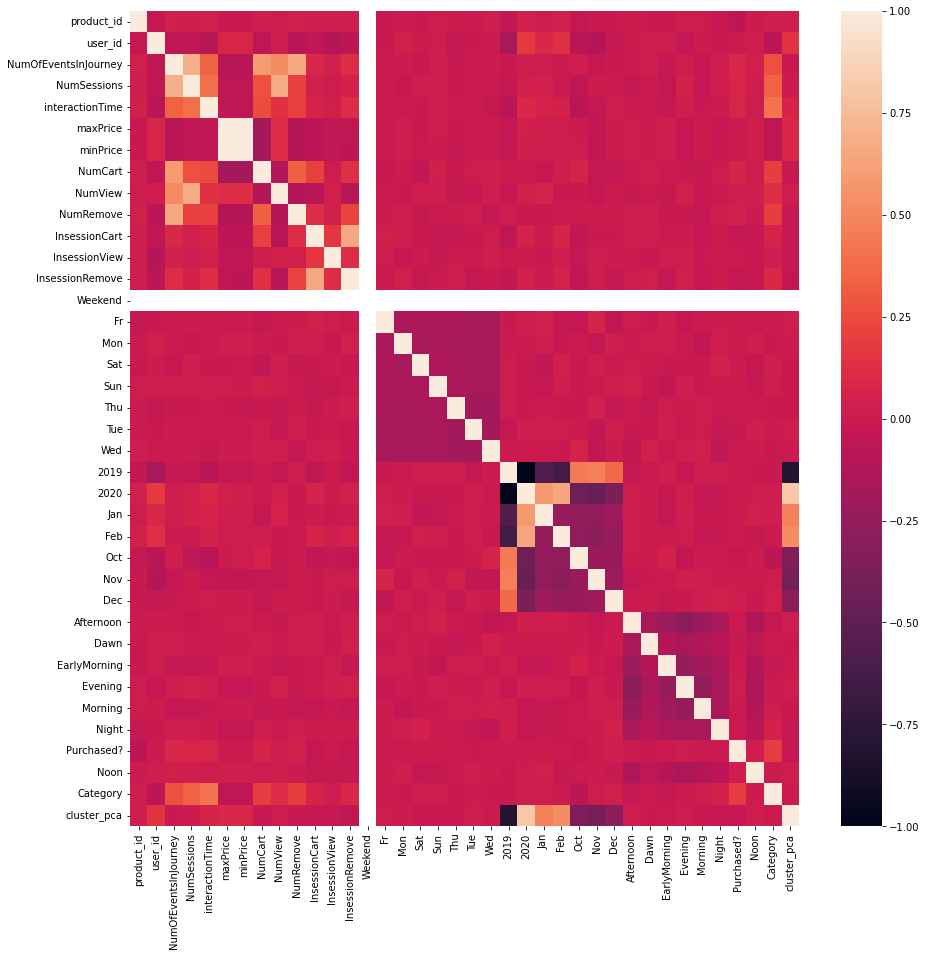

In [285]:
corr = past.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [286]:
past.Weekend.unique()

array([0.])

Weekend is correlated with everything because it only has one unique value. It is therefore a useless feature.

Looking just at the correlations between the cluster classifications and the other features, it seems that the clusters might have segmented the customers by the year and month of the interaction. 2019 is very highly negatively correlated with the cluster and 2020 is very highly positive correlated with the cluster, with January and February being relatively highly positively correlated with cluster_pca and October, November, and December being relatively negatively correlated.

This requires some further investigation as to the distribution of the interaction years and months with respect to the cluster the customer was segmented into.

In [287]:
past["2019"].unique()[:50]
past["2020"].unique()[:50]

array([0.33333333, 0.5       , 0.75      , 1.        , 0.63636364,
       0.8       , 0.        , 0.83333333, 0.4       , 0.66666667,
       0.36363636, 0.57142857, 0.42857143, 0.4375    , 0.77777778,
       0.6       , 0.69565217, 0.25      , 0.22222222, 0.125     ,
       0.54761905, 0.55555556, 0.61111111, 0.28571429, 0.16666667,
       0.2       , 0.14285714, 0.41666667, 0.6969697 , 0.45744681,
       0.46875   , 0.65789474, 0.64705882, 0.54545455, 0.71428571,
       0.47058824, 0.58333333, 0.36      , 0.42307692, 0.53125   ,
       0.07692308, 0.85714286, 0.45454545, 0.26086957, 0.56561086,
       0.52631579, 0.46428571, 0.49315068, 0.7       , 0.625     ])

array([0.66666667, 0.5       , 0.25      , 0.        , 0.36363636,
       0.2       , 1.        , 0.16666667, 0.6       , 0.33333333,
       0.63636364, 0.42857143, 0.57142857, 0.5625    , 0.22222222,
       0.4       , 0.30434783, 0.75      , 0.77777778, 0.875     ,
       0.45238095, 0.44444444, 0.38888889, 0.71428571, 0.83333333,
       0.8       , 0.85714286, 0.58333333, 0.3030303 , 0.54255319,
       0.53125   , 0.34210526, 0.35294118, 0.45454545, 0.28571429,
       0.52941176, 0.41666667, 0.64      , 0.57692308, 0.46875   ,
       0.92307692, 0.14285714, 0.54545455, 0.73913043, 0.43438914,
       0.47368421, 0.53571429, 0.50684932, 0.3       , 0.375     ])

<AxesSubplot:>

(array([ 6.,  9., 16., 25., 44., 69., 61., 24., 21.,  8.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, '2019')

<AxesSubplot:>

(array([ 7., 21., 26., 60., 68., 45., 26., 14.,  9.,  7.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, '2020')

<AxesSubplot:>

(array([30., 67., 70., 41., 16.,  8.,  3.,  3.,  2.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Jan')

<AxesSubplot:>

(array([32., 70., 63., 31., 12., 13.,  5.,  5.,  5.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Feb')

<AxesSubplot:>

(array([41., 74., 66., 25., 13., 10.,  5.,  3.,  3.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Oct')

<AxesSubplot:>

(array([29., 65., 64., 38., 17.,  8.,  4.,  4.,  2.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Nov')

<AxesSubplot:>

(array([37., 78., 57., 17., 10.,  7.,  4.,  2.,  2.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Dec')

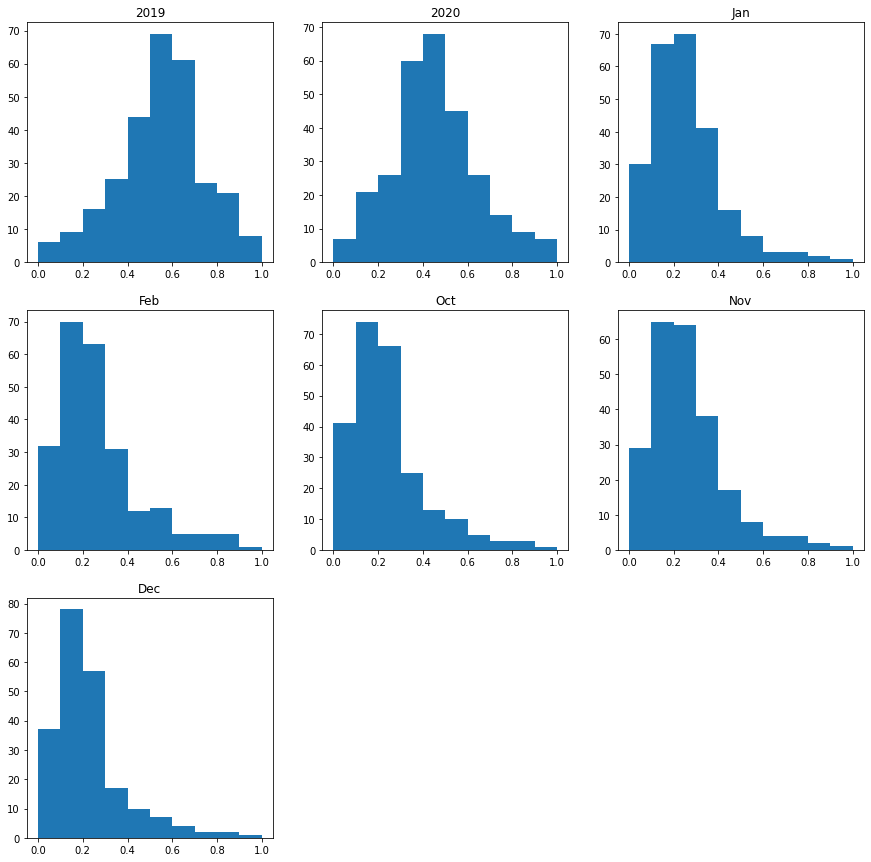

In [288]:
fig = plt.figure(figsize=(15, 15))

plt.subplot(3, 3, 1)
plt.hist(past["2019"].unique())
plt.title("2019")

plt.subplot(3, 3, 2)
plt.hist(past["2020"].unique())
plt.title("2020")

plt.subplot(3, 3, 3)
plt.hist(past["Jan"].unique())
plt.title("Jan")

plt.subplot(3, 3, 4)
plt.hist(past["Feb"].unique())
plt.title("Feb")

plt.subplot(3, 3, 5)
plt.hist(past["Oct"].unique())
plt.title("Oct")

plt.subplot(3, 3, 6)
plt.hist(past["Nov"].unique())
plt.title("Nov")

plt.subplot(3, 3, 7)
plt.hist(past["Dec"].unique())
plt.title("Dec")

In [289]:
past.sample(10)[["2019", "2020", "Jan", "Feb", "Oct", "Nov", "Dec"]]

,2019,2020,Jan,Feb,Oct,Nov,Dec
384,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2520,0.500000,0.500000,0.000000,0.500000,0.000000,0.500000,0.000000
2828,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2815,0.333333,0.666667,0.333333,0.333333,0.333333,0.000000,0.000000
4228,0.500000,0.500000,0.000000,0.500000,0.500000,0.000000,0.000000
138,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1539,0.000000,1.000000,0.333333,0.666667,0.000000,0.000000,0.000000
4677,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1197,1.000000,0.000000,0.000000,0.000000,0.285714,0.571429,0.142857
4092,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000


Since the Jan, Feb, Oct, Nov, Dec, 2019, and 2020 features are all float values, it is likely that they have been scaled between 0 and 1 in order to incorporate information about the time of year it happened, in the case of 2019 and 2020, or the time of month it happened, in the case of the months.

However, it is very difficult to guess at exactly how these features were processed without a more detailed data lineage document; the one provided referred to the "Year" feature (here denoting both 2019 and 2020) as referring to "The year during which this journey happens" and likewise for the month features. 

As can be seen from the samples above as well as the unique values of all these features, while there are rows in which only 1 year and 1 month have a 1.0 value and all other features have 0.0 as their value, there are also rows which have numbers in between 0 and 1, with the total between the two years equalling 1 and the same being true between the months.

The fact that the year and month features add up to 1 would suggest that these values denote a proportion, based on the amount of time the journey occurred across all this time. Given that there are samples which have non-zero entries months apart, it would also seem to be the case that these "journeys" refer to every time that this customer (customer_id) viewed this product (product_id), rather than denoting a single session extended across months.

Customers that continously return to the same product might either be recurring customers of that product (ie. a food item) or customers that regularly check the price to see if they can buy the product on a sale.

In [290]:
past.groupby("cluster_pca")[["2019", "2020", "Jan", "Feb", "Oct", "Nov", "Dec"]].mean()

,2019,2020,Jan,Feb,Oct,Nov,Dec
cluster_pca,,,,,,,
0,0.851037,0.148963,0.075174,0.073789,0.289952,0.318261,0.242824
1,0.382883,0.617117,0.220721,0.396396,0.081081,0.202703,0.099099
2,0.166667,0.833333,0.833333,0.000000,0.000000,0.000000,0.166667
3,0.567032,0.432968,0.237015,0.195953,0.243114,0.154160,0.169759
4,0.266089,0.733911,0.342318,0.391593,0.088342,0.088303,0.089444


From this summary of means across all the relevant features grouped by cluster, one can notice some distinct separations in certain clusters: Cluster 0 is dominated by sessions from 2019, cluster 2 is dominated by 2020 and January sessions, Cluster 4 is dominated by 2020 sessions, etc.

Focussing on these features, along with potentially relevant features like Category, one can start understanding these customer segmentations better and create a business model for the kind of customer they might be: holiday shopper, electronics shopper, regular groceries shopper, etc. 

Knowing these customer profiles should allow a business to combine a clustering pipeline like the one created in this notebook with marketing and promotional campaigns targeted towards these particular customers.

In [291]:
past.groupby("cluster_pca")[["minPrice", "maxPrice", "Category", "2019", \
    "2020", "Jan", "Feb", "Oct", "Nov", "Dec"]].mean()

,minPrice,maxPrice,Category,2019,2020,Jan,Feb,Oct,Nov,Dec
cluster_pca,,,,,,,,,,
0,5.716903,5.739747,1.140424,0.851037,0.148963,0.075174,0.073789,0.289952,0.318261,0.242824
1,4.364459,4.789414,1.477477,0.382883,0.617117,0.220721,0.396396,0.081081,0.202703,0.099099
2,2.433333,2.593333,3.500000,0.166667,0.833333,0.833333,0.000000,0.000000,0.000000,0.166667
3,63.401591,63.456814,1.059362,0.567032,0.432968,0.237015,0.195953,0.243114,0.154160,0.169759
4,6.354377,6.387249,1.143503,0.266089,0.733911,0.342318,0.391593,0.088342,0.088303,0.089444


Including minPrice, maxPrice, and Category along with the month and year features shows a more complete view of each of the clusters. It seems that Cluster 3 is for example dominated by higher-priced products than all the other clusters. There is also a noticeable difference between the prices of the other clusters, with min and max prices increasing in the order: Cluster 2 < Cluster 1 < Cluster 0 < Cluster 4 < Cluster 3. Cluster 2 is also dominated by the higher-valued categories: knowing what these categories translate to in real life could allow a business to offer promotions for these products to these particular customers.

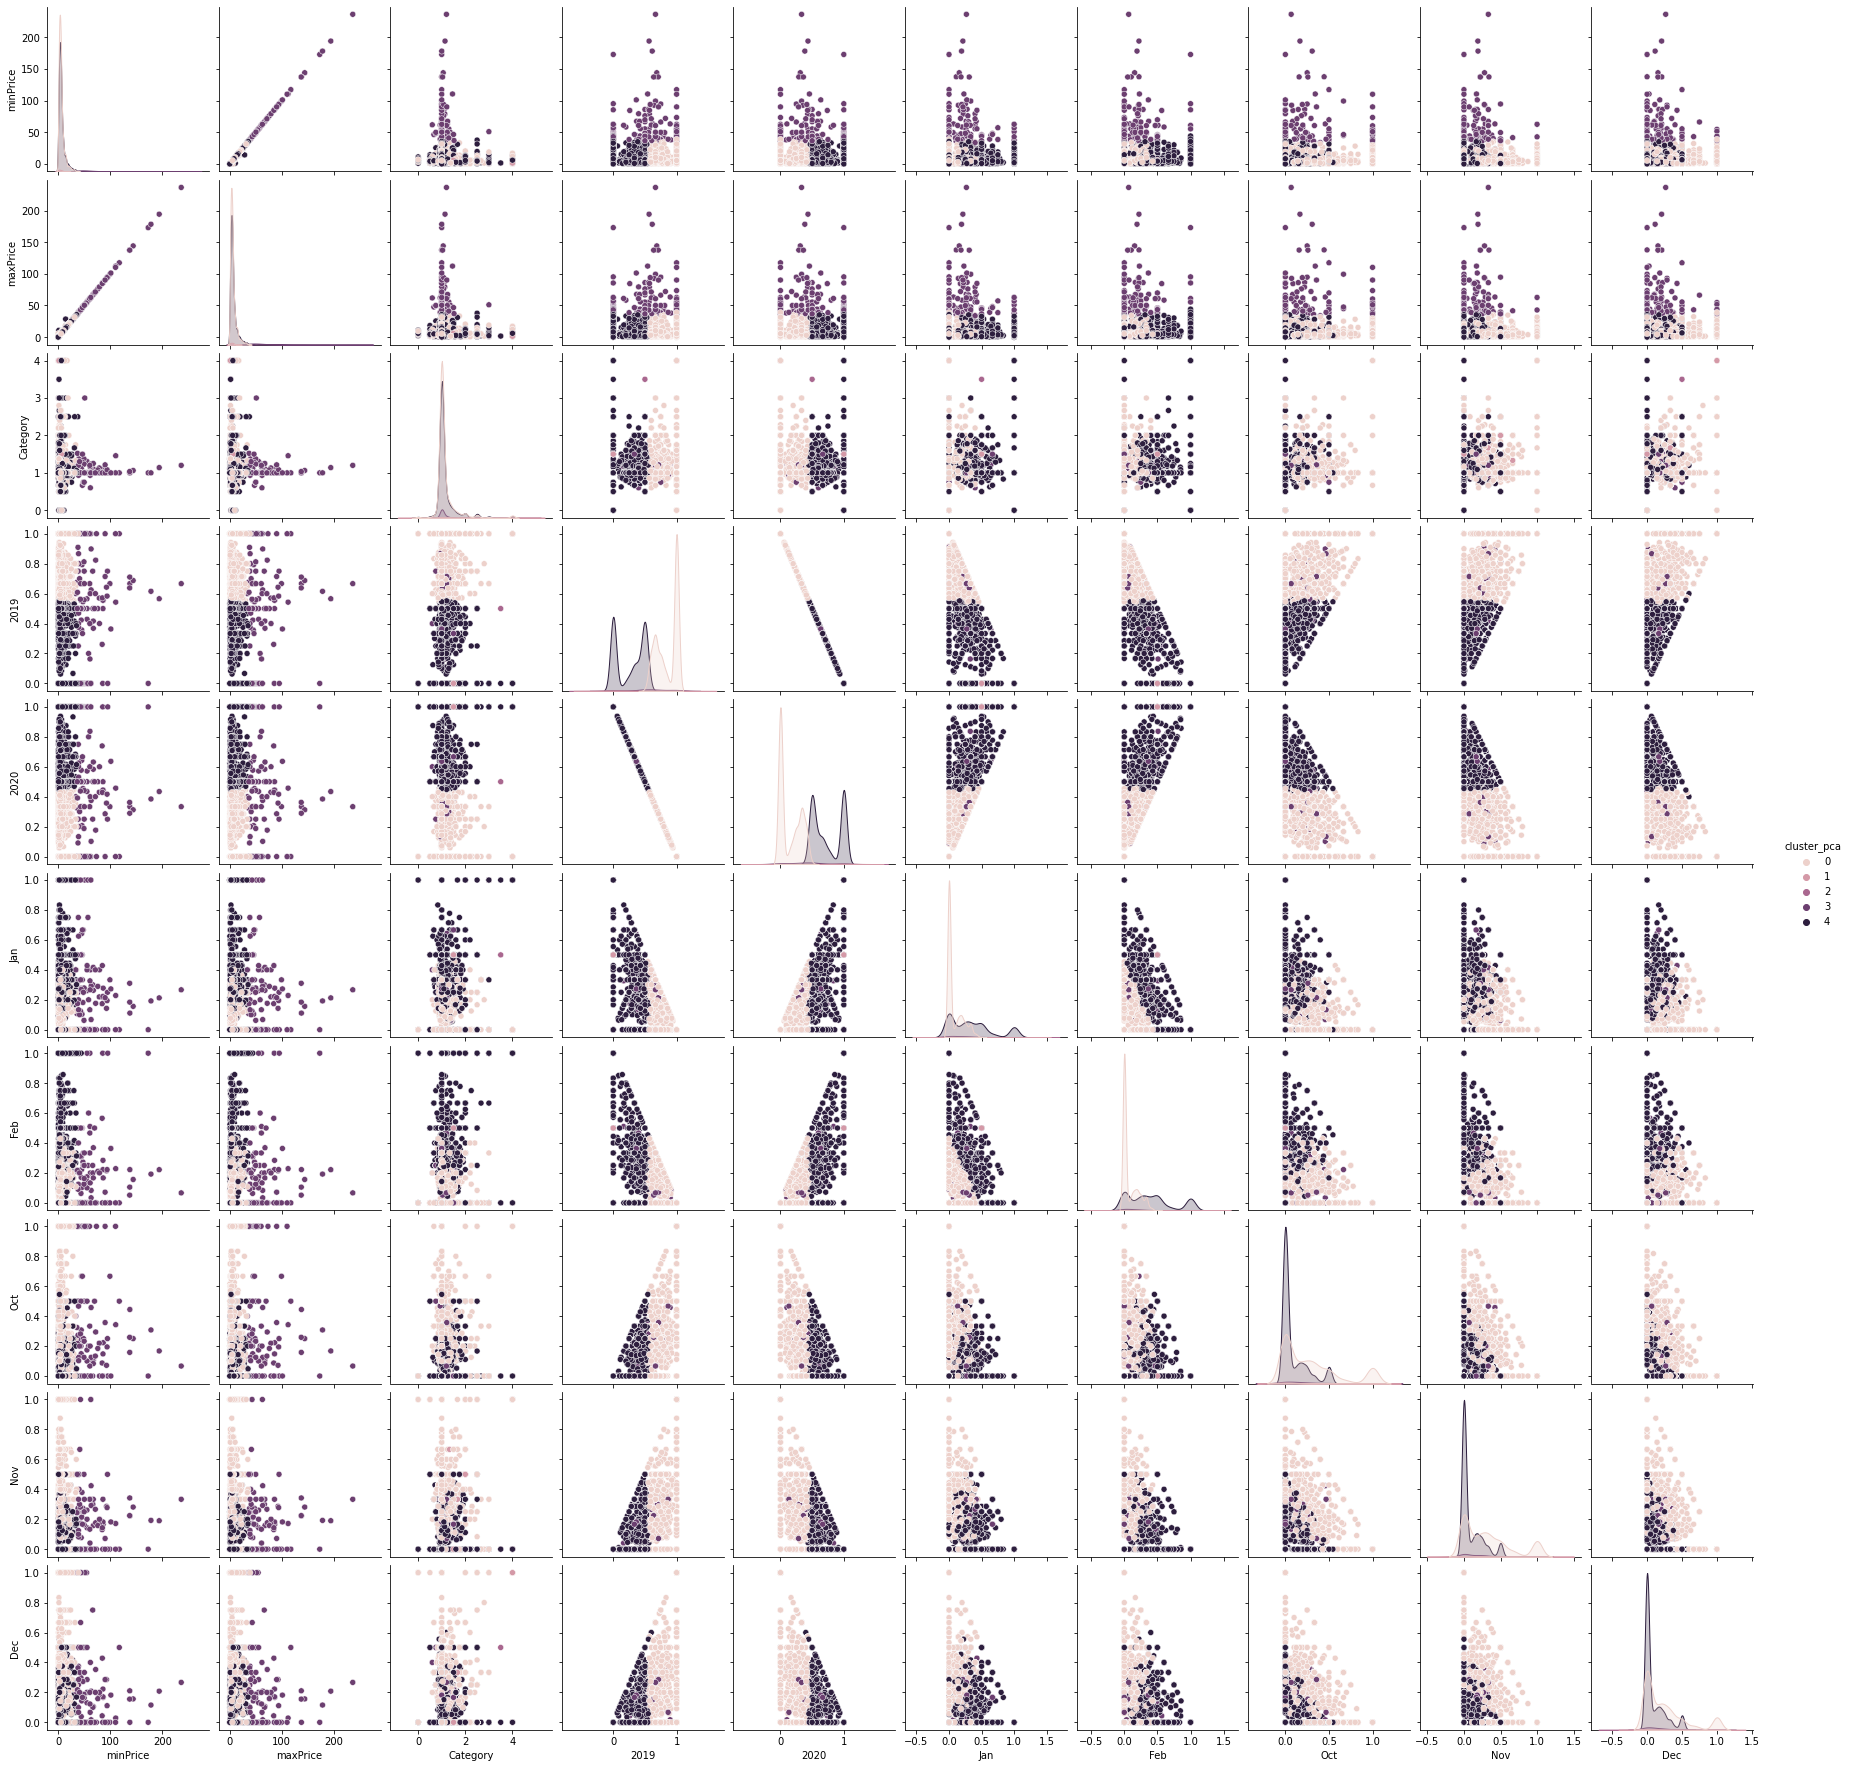

In [292]:
sns.pairplot(past, diag_kind='kde', hue="cluster_pca", \
    vars=["minPrice", "maxPrice", "Category", "2019", "2020", "Jan", "Feb", "Oct", "Nov", "Dec"])

The pairplot above is another great visualization of how well separated these clusters are in these particular features of interest, particularly for clusters 0 and 4, the most sizable ones.

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

`Answer`: Two of the assumptions for k-means include the clusters being spherical and of similar size. Considering that clusters 0 and 4 are so much larger than the other clusters, k-means might not be the best approach for this dataset.

In [293]:
# YOUR CODE HERE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

for eps in [0.5, 1, 1.5, 2, 2.5, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    dbs = DBSCAN(eps=eps)
    cluster_labels = dbs.fit_predict(X_reduced[:4000])

    silhouette_avg = silhouette_score(X_reduced[:4000], cluster_labels)
    # type(cluster_labels)
    # print(np.unique(cluster_labels))
    print(
            "For n_clusters =",
            len(np.unique(cluster_labels)),
            "and eps =",
            eps,
            "\nThe average silhouette_score is :",
            silhouette_avg,
        )

For n_clusters = 10 and eps = 0.5 
The average silhouette_score is : -0.07017740775510163
For n_clusters = 5 and eps = 1 
The average silhouette_score is : 0.3013319991273475
For n_clusters = 5 and eps = 1.5 
The average silhouette_score is : 0.6148405929627604
For n_clusters = 2 and eps = 2 
The average silhouette_score is : 0.8138002471863333
For n_clusters = 2 and eps = 2.5 
The average silhouette_score is : 0.8309565810664694
For n_clusters = 2 and eps = 3 
The average silhouette_score is : 0.8464020794865866
For n_clusters = 3 and eps = 4 
The average silhouette_score is : 0.8197000242666688
For n_clusters = 2 and eps = 5 
The average silhouette_score is : 0.895794328688834
For n_clusters = 2 and eps = 6 
The average silhouette_score is : 0.895794328688834
For n_clusters = 2 and eps = 7 
The average silhouette_score is : 0.9055734003612185
For n_clusters = 2 and eps = 8 
The average silhouette_score is : 0.9055734003612185
For n_clusters = 2 and eps = 9 
The average silhouette_sco

Since the max sihouette score was reached at eps=10, we'll pick eps=10. The silhouette scores are significantly better with the DBSCAN than with K-means.

In [294]:
dbs = DBSCAN(eps=10)
cluster_dbs = dbs.fit_predict(X_reduced.sort_index())

dbs_past = past.copy()
dbs_past["cluster_dbs"] = cluster_dbs

In [295]:
dbs_past.cluster_dbs.value_counts()

 0    4998
-1       2
Name: cluster_dbs, dtype: int64

It would appear that picking an eps of 10 just leads to a single cluster containing almost all the points, and a second cluster with two outliers. This is almost useless clustering of the data. Next we'll try an eps of 4 and see the distribution between clusters.

In [296]:
dbs = DBSCAN(eps=4)
cluster_dbs = dbs.fit_predict(X_reduced.sort_index())

dbs_past = past.copy()
dbs_past["cluster_dbs"] = cluster_dbs

In [297]:
dbs_past.cluster_dbs.value_counts()

 0    4984
 1       9
-1       7
Name: cluster_dbs, dtype: int64

Once again, it seems that this method is making a single huge cluster with most of the data and capturing outliers in a separate cluster.

<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

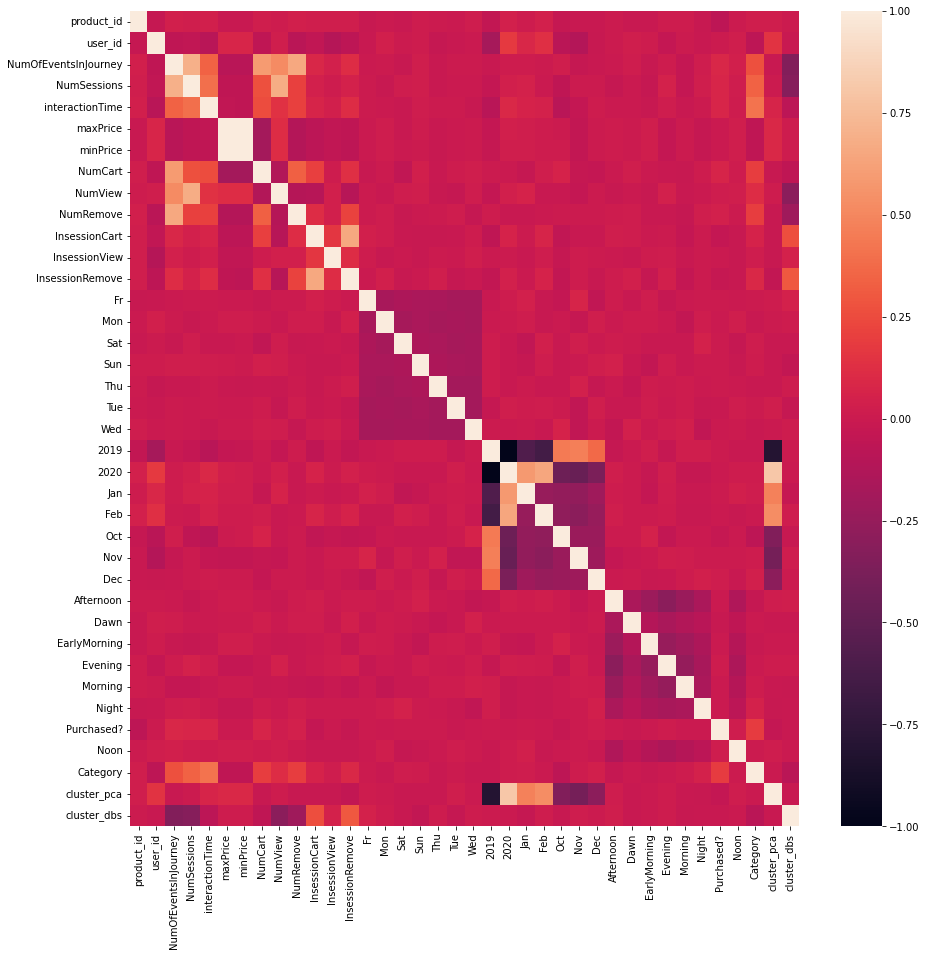

In [298]:
plt.figure(figsize=(15, 15))
sns.heatmap(dbs_past.drop(["Weekend"], axis=1).corr())

In [299]:
dbs_past.groupby("cluster_dbs")[["NumOfEventsInJourney", "NumSessions", "NumView", \
    "NumRemove", "InsessionCart", "InsessionRemove"]].mean()

,NumOfEventsInJourney,NumSessions,NumView,NumRemove,InsessionCart,InsessionRemove
cluster_dbs,,,,,,
-1,19.785714,10.714286,10.285714,6.857143,377.857143,602.785714
0,1.926545,1.313856,0.881809,0.404687,20.947709,20.449057
1,1.666667,1.333333,0.166667,0.333333,889.166667,1373.444444


In [300]:
dbs_past.groupby("cluster_dbs")[["minPrice", "maxPrice", "Category", "2019", \
    "2020", "Jan", "Feb", "Oct", "Nov", "Dec"]].mean()

,minPrice,maxPrice,Category,2019,2020,Jan,Feb,Oct,Nov,Dec
cluster_dbs,,,,,,,,,,
-1,1.687143,1.790000,2.642857,0.214286,0.785714,0.642857,0.142857,0.142857,0.000000,0.071429
0,7.436139,7.466420,1.141481,0.574203,0.425797,0.201736,0.224061,0.195522,0.208506,0.170175
1,6.452778,6.981667,1.222222,0.333333,0.666667,0.333333,0.333333,0.000000,0.222222,0.111111


`Answer`: DBSCAN works off of the assumption that clusters are dense regions in space separated by regions of lower density. During our visualization of some of the principal components of our data in 2D and 3D space, it certainly seemed like there was one single dense region of space occupied by most of the points, which is likely why this method was mostly useless on our data, at least for the purpose of customer segmentation.

11. Jot down recommendations or followup steps, detailing the reasons.

`Answer`: Some followup steps I would take would be to once again visualize the principal components of the data, especially viewing the 3D visualization from a few angles. This would better inform my choice of clustering technique, as different clustering techniques make different assumptions of the type of clusters present in the data, which means that the choice is dependent on the distribution of data.

Another potential step is to seek out more domain knowledge from the data source, as sometimes this might inform how many clusters are expected, or the connection between different segments of the space.

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [301]:
# YOUR CODE HERE
new = pd.read_csv("../dat/new.csv.gz")
new.shape

(30091, 5)

In [302]:
assert new.shape == (30091, 5)

In [303]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

`Answer`: The number of datapoints in the training set is much less than in the test set. Also, the feature set of the training set (before PCA) is significantly larger than the feature set of the test set (34 features vs 4, not including the target).

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [304]:
# YOUR CODE HERE
print(f"Number of product ids in both past and new data: {len(np.intersect1d(past.product_id, new.product_id))}")

Number of product ids in both past and new data: 0


4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [305]:
# YOUR CODE HERE # ~.344
new["Purchased?"].mean()

0.3442557575354757

5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [312]:
# YOUR CODE HERE
X_train = past.copy()[new.columns].drop("product_id", axis=1)
X_test = new.copy().drop("product_id", axis=1)
y_train = X_train.pop("Purchased?")
y_test = X_test.pop("Purchased?")
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(5000, 3)

(30091, 3)

(5000,)

(30091,)

In [313]:
# Converting dataframes into ndarrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [314]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [315]:
# YOUR CODE HERE
clf = LogisticRegression(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

LogisticRegression(class_weight='balanced', random_state=42)

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [316]:
# YOUR CODE HERE
X = np.concatenate((X_train, X_test), axis=0)

In [317]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [318]:
# YOUR CODE HERE
y = np.concatenate((y_train, -1*np.ones(y_test.shape)))

In [319]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [320]:
# YOUR CODE HERE
from sklearn.semi_supervised import LabelSpreading

ssl = LabelSpreading(kernel='knn', alpha=0.01)
ssl.fit(X, y)

LabelSpreading(alpha=0.01, kernel='knn')

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [321]:
semi_sup_preds = ssl.transduction_[X_train.shape[0]:] # YOUR CODE HERE

In [322]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [323]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     19732
           1       0.81      0.63      0.71     10359

    accuracy                           0.82     30091
   macro avg       0.82      0.78      0.79     30091
weighted avg       0.82      0.82      0.82     30091



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [324]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



`Answer`: One of the major areas for improvement is with samples from the minority class: 1. The recall and f1-score are significantly worse than the precision, which is an issue, because the recall in particular increasing by minimizing the amount of False negatives, which in this case would be the majority class. Since there's an imbalance, there's a natural inclination of a model to predict the negative majority class more often, which must be taken into account when training the model.

However, the SSL approach improved on the supervised learning approach in nearly all metrics, including these very important ones, which is very promising.

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)